<a href="https://colab.research.google.com/github/robitussin/CCMACLRL_EXERCISES/blob/main/Exercise2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exercise 2

Machine Learning pipeline

1. Import the necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

2. Load the dataset


In [3]:
#put your answer here
df = pd.read_csv('./iris.csv')


In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.drop(columns="Id", inplace=True)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
df['Species'].value_counts()


Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

3. Visualize the dataset

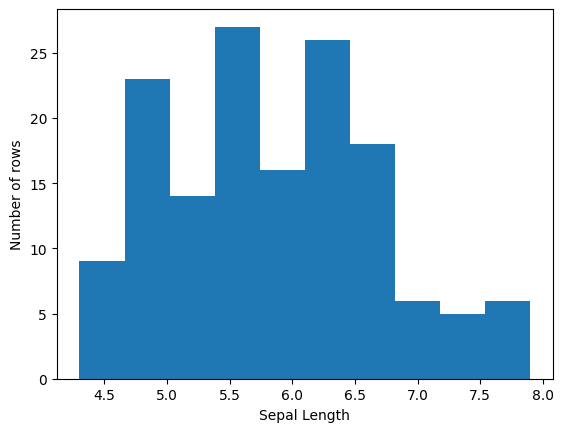

In [7]:
# put your answer here
plt.hist(df["SepalLengthCm"])
plt.xlabel("Sepal Length")
plt.ylabel("Number of rows")
plt.show()

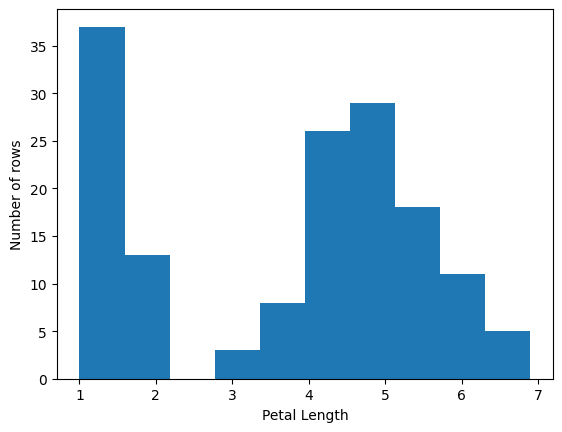

In [8]:
plt.hist(df["PetalLengthCm"])
plt.xlabel("Petal Length")
plt.ylabel("Number of rows")
plt.show()

Text(0.5, 1.0, 'petal_width')

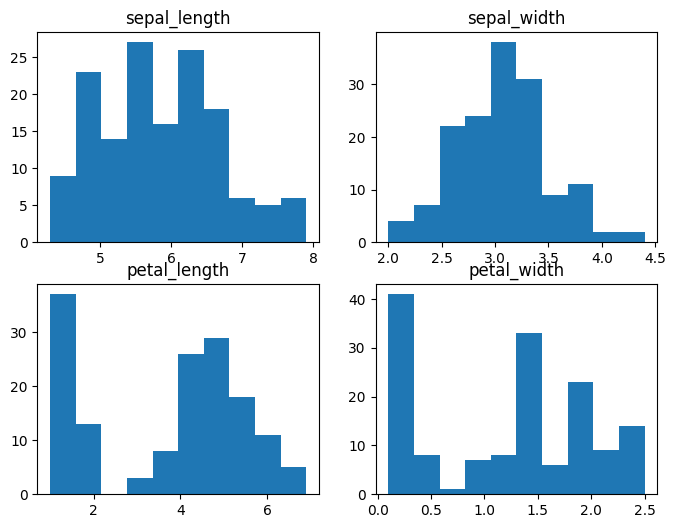

In [9]:
fig, ax =plt.subplots(2,2, figsize=(8,6))
ax[0,0].hist(df['SepalLengthCm']); ax[0,0].set_title("sepal_length")
ax[0,1].hist(df['SepalWidthCm']); ax[0,1].set_title("sepal_width")
ax[1,0].hist(df['PetalLengthCm']); ax[1,0].set_title("petal_length")
ax[1,1].hist(df['PetalWidthCm']);ax[1,1].set_title("petal_width")





In [10]:
colors = {
    'Iris-setosa':'red',
    'Iris-virginica':'blue',
    'Iris-versicolor':'green'
}

Text(0, 0.5, 'Sepal Width')

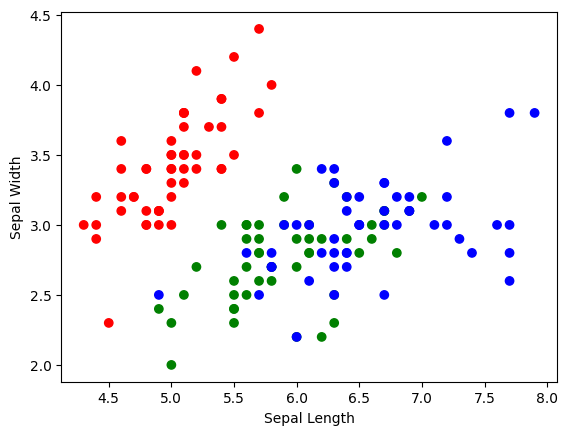

In [11]:
plt.scatter(df["SepalLengthCm"], df["SepalWidthCm"], c=df["Species"].map(colors))
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")


Text(0, 0.5, 'Petal Width')

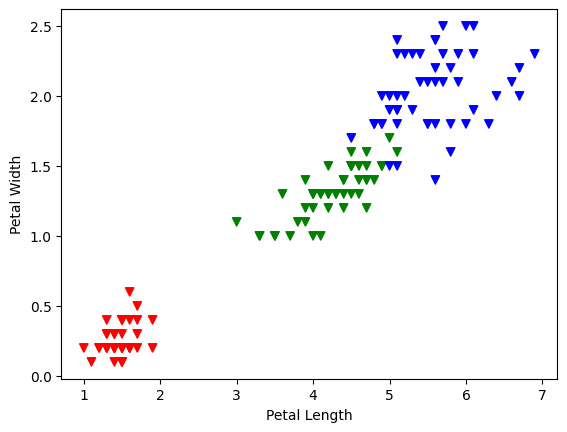

In [12]:
plt.scatter(df["PetalLengthCm"], df["PetalWidthCm"], c=df["Species"].map(colors), marker="v")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")

Text(0.5, 1.0, 'Petal Length and Sepal Length')

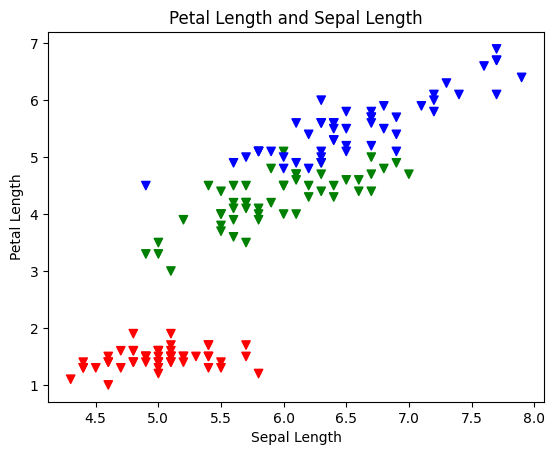

In [13]:
plt.scatter(df["SepalLengthCm"], df["PetalLengthCm"], c=df["Species"].map(colors), marker="v")
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.title("Petal Length and Sepal Length")

4. Split the dataset into a training set and a testing set

In [14]:
# put your answer here
X = df.drop(columns=['Species']).values

y = df['Species'].values
y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(120, 4)
(30, 4)
(120,)
(30,)


5. Train the model

In [16]:
# put your answer here
knn = KNeighborsClassifier(n_neighbors=13)

knn.fit(X_train, y_train)


y_pred = knn.predict(X_test)

metrics.accuracy_score(y_test, y_pred)



0.9666666666666667

6. Test the model

In [17]:
# put your answer here
knn.predict([[5.1,3.5,2.4,1.2]])

array(['Iris-setosa'], dtype=object)